In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
import sys
print(sys.version)

2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:09) [MSC v.1500 64 bit (AMD64)]


In [3]:
import warnings; warnings.simplefilter('ignore')

AttributeError: 'AxesSubplot' object has no attribute 'get_axis_bgcolor'

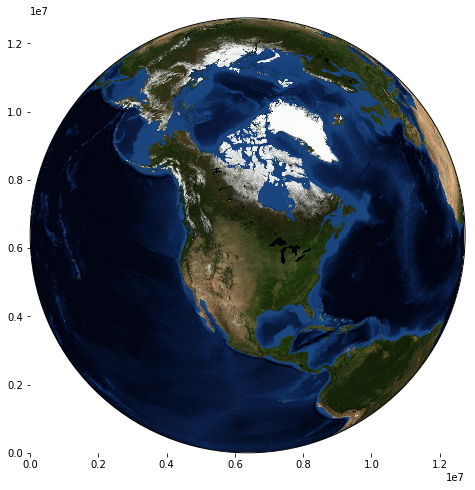

In [4]:
plt.figure(figsize=(8,8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

In [5]:
import pandas as pd
wf_tweet_cord = pd.read_csv('wildfire_sentiment_analysis_working.csv')

In [6]:
wf_tweet_cord.head()

,id,user_location,Lat,Long
0,1,"ÜT: 19.751064,-155.535777",19.751064,-155.535777
1,6,"Alaska, USA",58.299730,-134.406790
2,9,"Mountain View, CA",37.389670,-122.081610
3,10,Harlan County Kentucky,36.842810,-83.280300
4,12,San Francisco,37.777130,-122.419640


In [7]:
lat = wf_tweet_cord['Lat'].values
lon = wf_tweet_cord['Long'].values

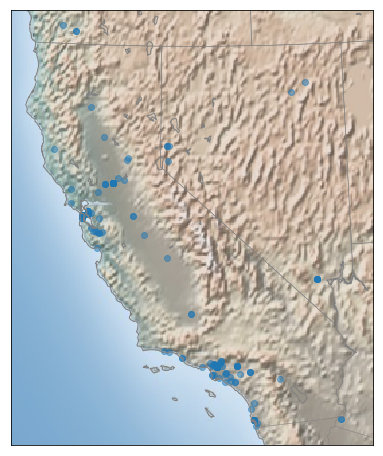

In [8]:
# draw the map background
fig = plt.figure(figsize=(8,8))
m = Basemap(projection='lcc', resolution='h', lat_0=37.5, lon_0=-119,\
           width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

# plot scatter points on map
m.scatter(lon, lat, latlon=True, cmap='Reds', alpha=0.5)
#plt.colorbar(label=r'No of tweets')
plt.clim(7, 3)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], alpha=0.5)

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left')

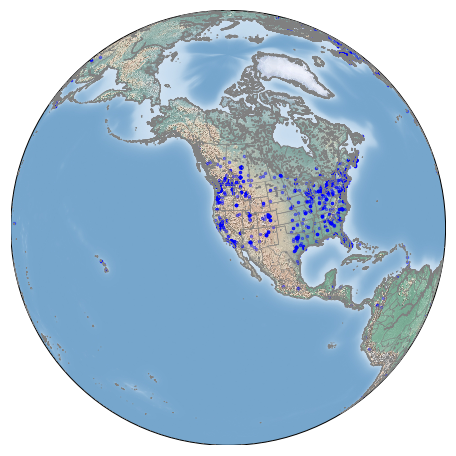

In [12]:
# draw the map background
fig = plt.figure(figsize=(12,8))
# orthogonal projection
m = Basemap(projection='ortho', resolution='h', lat_0=37.5, lon_0=-119)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

# plot scatter points on map
m.scatter(lon, lat, latlon=True, alpha=0.4, s=6, color='b')

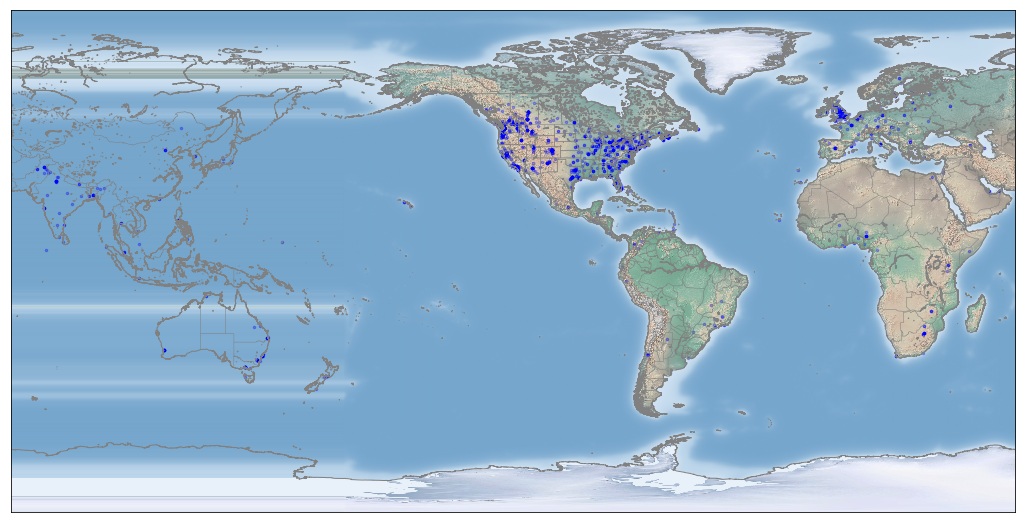

In [15]:
# draw the map background
fig = plt.figure(figsize=(18,15))
# The simplest projection, just displays the world in latitude/longitude coordinates
m = Basemap(projection='cyl', resolution='h', lat_0=37.5, lon_0=-119)
m.shadedrelief(scale=0.5)
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

# plot scatter points on map
m.scatter(lon, lat, latlon=True, alpha=0.3, marker='o', color='b', s=6)
#plt.colorbar(label=r'No of tweets')
plt.clim(3, 17)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


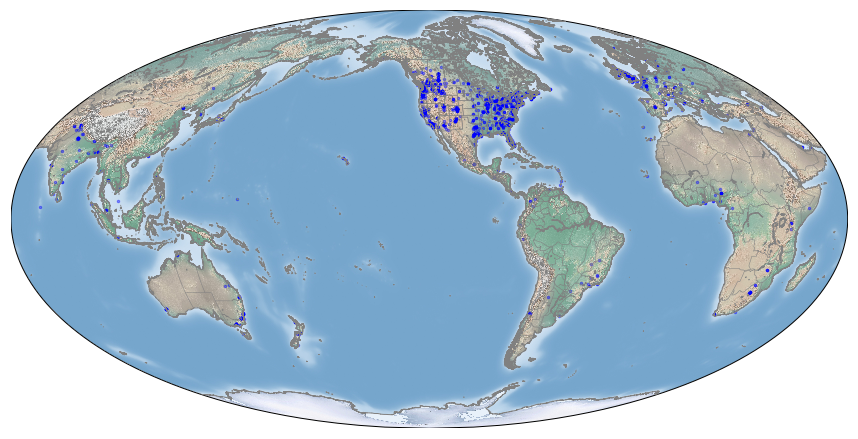

In [16]:
# draw the map background
fig = plt.figure(figsize=(15,12))
# The mollweide projection is a global, elliptical, equal-area projection
m = Basemap(projection='moll', resolution='h', lat_0=37.5, lon_0=-119)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

# plot scatter points on map
m.scatter(lon, lat, latlon=True, alpha=0.4, color='b', s=6)
#plt.colorbar(label=r'No of tweets')
plt.clim(3, 17)

In [ ]:
m = Basemap(llcrnrlon=-135, llcrnrlat=23, urcrnrlon=-50, urcrnrlat=52, projection='cass', resolution='i')

In [ ]:
# draw the map background
fig = plt.figure(figsize=(15,12))
# The transverse aspect of the equidistant cassindrical projection. The globe is first rotated so the \
# central meridian becomes the “equator”, and then the normal equidistant cylindrical projection is applied
m = Basemap(projection='cass', resolution='h', lat_0=40, lon_0=-100,\
           llcrnrlon=-135,llcrnrlat=23,urcrnrlon=-50,urcrnrlat=52)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

# draw parallels (latitude)
parallels = np.arange(0.,90.,10.)
m.drawparallels(parallels, labels=[1,0,0,0], fontsize=10)

# draw meridians (longitude)
meridians = np.arange(180.,360.,10.)
m.drawmeridians(meridians=meridians, labels=[0,0,0,1], fontsize=10)

# plot scatter points on map
m.scatter(lon, lat, latlon=True, alpha=0.4, color='b', s=6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(5, 5, [-102.74616639578684, 31.420050782234483, 0.0, 0.0], [-100.39704337951974, 34.87992201729806, 0.0, 0.0], <matplotlib.collections.LineCollection object at 0x000000C501F15A90>)


AttributeError: type object 'map' has no attribute 'miles_buffer6'

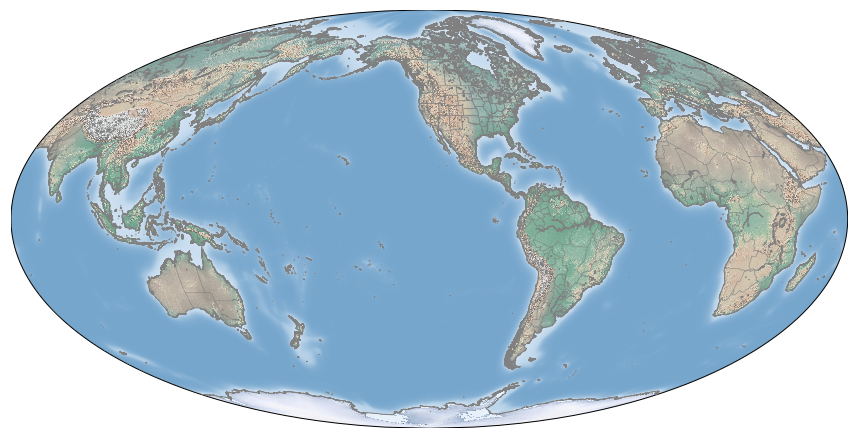

In [14]:
# draw the map background
fig = plt.figure(figsize=(15,12))
# The mollweide projection is a global, elliptical, equal-area projection
m = Basemap(projection='moll', resolution='h', lat_0=37.5, lon_0=-119)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')

shp_info = m.readshapefile('shapefiles/miles_buffer6','miles_buffer6')
print(shp_info)
for info, miles_buffer in zip(map.miles_buffer6.GetInfo, map.miles_buffer6):
    m.plot(miles_buffer[0], miles_buffer[1], marker='+', color='m', markersize=8, markeredgewidth=2)
plt.show()

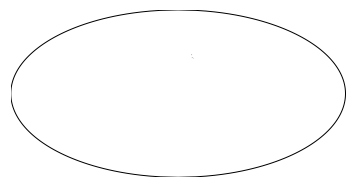

In [59]:
shp_info = m.readshapefile('shapefiles/miles_buffer6','miles_buffer6')

In [5]:
import geopandas as gp

In [21]:
all_loc = gp.GeoDataFrame.from_file('shapefiles/All_Locations.shp')

In [7]:
miles6 = gp.GeoDataFrame.from_file('shapefiles/miles_buffer6.shp')

In [8]:
miles6.shape

(5, 12)

In [22]:
all_loc.head(10)

,LOCNUM,LOCNAME,ACCGRPNUM,ACCGRPNAME,STREETNAME,POSTALCODE,CITY,COUNTY,STATE,COUNTRY,...,YEARBUILT,FLOORAREA_,Geo__Resol,TIV,EQ_AAL,WS_AAL,CS_AAL,Total_AAL,Premium,geometry
0,919,PIEHL FAMILY PARTNERS,NA3000192102,NA3000192102,29 SOUTHRIDGE DR,79015,CANYON,RANDALL COUNTY,TEXAS,US,...,1976,3200,Street / Building / Parcel,"343,200",5,0,"1,209","1,214",8437,POINT (-101.929167 34.986743)
1,4825,MARCOS ACOSTA,NAH050627301,NAH050627301,500 STAR ST,79045,HEREFORD,DEAF SMITH COUNTY,TEXAS,US,...,1975,2489,Street / Building / Parcel,"361,150",3,0,"1,175","1,178",2832,POINT (-102.388633 34.834206)
2,674,CRUZ E. MALDONADO,NAH050485403,NAH050485403,715 STANTON ST,79045,HEREFORD,DEAF SMITH COUNTY,TEXAS,US,...,1975,1052,Street / Building / Parcel,"204,000",1,0,"1,104","1,105",1038,POINT (-102.394973 34.840238)
3,5851,Robert J Mathis and wife Jaicee N Mathis,NAH050040007,NAH050040007,3285 FM 2652,76450,GRAHAM,YOUNG COUNTY,TEXAS,US,...,1988,2156,Street / Building / Parcel,"405,900",0,5,"1,002","1,007",4223,POINT (-98.5698 33.21177)
4,4697,DAVID SMITH,NAH050299205,NAH050299205,807 W 7TH ST,79347,MULESHOE,BAILEY COUNTY,TEXAS,US,...,1975,1362,Street / Building / Parcel,"189,100",0,0,854,855,1691,POINT (-102.735 34.22387)
5,1738,MALDONADO KELLY,NAH050647100,NAH050647100,1057 N AVENUE H,79763,ODESSA,ECTOR COUNTY,TEXAS,US,...,1967,1360,Street / Building / Parcel,"272,000",3,1,838,842,1365,POINT (-102.418484 31.83961)
6,1858,Erica Marquez,NAH050499003,NAH050499003,1514 E 6TH ST,79022,DALHART,DALLAM COUNTY,TEXAS,US,...,1975,1204,Street / Building / Parcel,"184,500",2,0,821,823,1192,POINT (-102.506134 36.060259)
7,916,PIEHL FAMILY PARTNERS,NA3000191802,NA3000191802,800 N FM 2381,79012,BUSHLAND,POTTER COUNTY,TEXAS,US,...,1956,1761,Street / Building / Parcel,"222,000",4,0,810,814,7784,POINT (-102.06341 35.25084)
8,3218,GABRIEL ACEVEDO,NAH050562602,NAH050562602,221 E US HIGHWAY 70,79031,EARTH,LAMB COUNTY,TEXAS,US,...,1970,4178,Street / Building / Parcel,"408,000",1,0,791,792,5005,POINT (-102.4093 34.23322)
9,1839,MANUEL RODRIGUEZ ESPINO,NAH050600901,NAH050600901,1212 S MAIN ST,79045,HEREFORD,DEAF SMITH COUNTY,TEXAS,US,...,1975,1500,Street / Building / Parcel,"225,000",1,0,786,788,1506,POINT (-102.394171 34.796789)


In [131]:
miles6.crs

{'init': u'epsg:4326'}

In [9]:
miles6

,NAME,CITY,POSTALCODE,State,country,EVENTID,LATITUDE,LONGITUDE,Aggregate,BUFF_DIST,ORIG_FID,geometry
0,"SAN ANGELO, TX 76901, US",SAN ANGELO,76901,Texas,United States,1073742151,31.463586,-100.447841,"36,596,681",3.0,0,"POLYGON ((-100.4478411 31.50712972099926, -100..."
1,"ODESSA, TX 79761, US",ODESSA,79761,Texas,United States,1073742152,31.863110,-102.362329,"30,115,297",3.0,1,"POLYGON ((-102.3623286 31.90665141056233, -102..."
2,"MIDLAND, TX 79701, US",MIDLAND,79701,Texas,United States,1073742153,31.996517,-102.099104,"20,466,760",3.0,2,"POLYGON ((-102.0991036 32.04005757462282, -102..."
3,"HEREFORD, TX 79045, US",HEREFORD,79045,Texas,United States,1073742154,34.836402,-102.379673,"10,935,330",3.0,3,"POLYGON ((-102.3796735 34.87992201729806, -102..."
4,"FRIONA, TX 79035, US",FRIONA,79035,Texas,United States,1073742155,34.622029,-102.693522,"9,821,180",3.0,4,"POLYGON ((-102.6935224 34.66555080220901, -102..."


In [10]:
from shapely.geometry import Point
for index, row in miles6.iterrows():
    for pt in list(row['geometry'].exterior.coords):
        print Point(pt)

POINT (-100.4478411 31.50712972099926)
POINT (-100.4457814246729 31.5070939333918)
POINT (-100.4437251380863 31.50698662944889)
POINT (-100.441675623382 31.50680798571167)
POINT (-100.439636252514 31.50655829609135)
POINT (-100.4376103806779 31.50623797138363)
POINT (-100.4356013407686 31.50584753859013)
POINT (-100.4336124378757 31.50538764004782)
POINT (-100.4316469438249 31.50485903236803)
POINT (-100.429708091776 31.50426258518677)
POINT (-100.4277990708853 31.50359927972844)
POINT (-100.4259230210418 31.50287020718531)
POINT (-100.4240830276865 31.50207656691567)
POINT (-100.4222821167224 31.50121966446337)
POINT (-100.4205232495246 31.50030090940231)
POINT (-100.4188093180587 31.4993218130095)
POINT (-100.4171431401148 31.49828398577028)
POINT (-100.4155274546662 31.49718913472035)
POINT (-100.4139649173599 31.4960390606286)
POINT (-100.4124580961463 31.49483565502581)
POINT (-100.4110094670551 31.49358089708388)
POINT (-100.4096214101258 31.49227685035108)
POINT (-100.4082962054

POINT (-102.3766183852549 31.90490942647316)
POINT (-102.3746209394275 31.90536929939548)
POINT (-102.3726032696503 31.90575971046634)
POINT (-102.3705686952766 31.90608001737094)
POINT (-102.368520563588 31.90632969312575)
POINT (-102.3664622442645 31.90650832694906)
POINT (-102.3643971238187 31.90661562493965)
POINT (-102.3623286 31.90665141056233)
POINT (-102.0991036 32.04005757462282)
POINT (-102.0970320820824 32.04002178966585)
POINT (-102.0949639724888 32.0399144936717)
POINT (-102.0929026739115 32.03973586317358)
POINT (-102.0908515777892 32.03948619206933)
POINT (-102.0888140587032 32.03916589113602)
POINT (-102.0867934688029 32.03877548735107)
POINT (-102.0847931322682 32.03831562302191)
POINT (-102.0828163398195 32.03778705472469)
POINT (-102.0808663432835 32.03719065205465)
POINT (-102.078946350224 32.03652739618966)
POINT (-102.077059518648 32.03579837826969)
POINT (-102.075208951794 32.03500479759476)
POINT (-102.0733976930122 32.0341479596444)
POINT (-102.071628720746 32.

POINT (-102.6892565860575 34.66540777473629)
POINT (-102.6871324551299 34.66522921103624)
POINT (-102.6850188392033 34.66497963335602)
POINT (-102.6829192162212 34.66465945237898)
POINT (-102.6808370409949 34.66426919496188)
POINT (-102.6787757394923 34.66380950326381)
POINT (-102.6767387031774 34.66328113368491)
POINT (-102.6747292834062 34.66268495561608)
POINT (-102.6727507858911 34.66202195000213)
POINT (-102.6708064652416 34.66129320772077)
POINT (-102.6688995195909 34.66049992777992)
POINT (-102.6670330853177 34.65964341533673)
POINT (-102.6652102318718 34.65872507954125)
POINT (-102.6634339567115 34.65774643120875)
POINT (-102.6617071803628 34.65670908032432)
POINT (-102.6600327416066 34.655614733384)
POINT (-102.658413392804 34.65446519057705)
POINT (-102.6568517953653 34.65326234281383)
POINT (-102.6553505153729 34.65200816860452)
POINT (-102.6539120193617 34.6507047307937)
POINT (-102.6525386702678 34.64935417315632)
POINT (-102.6512327235495 34.64795871686092)
POINT (-102.64

In [12]:
x = miles6.geometry[0]

In [13]:
print x[0]

TypeError: 'Polygon' object does not support indexing

In [15]:
import seaborn as sns
sns.set(rc={'image.cmap': 'cubehelix'})
sns.set_context('poster')

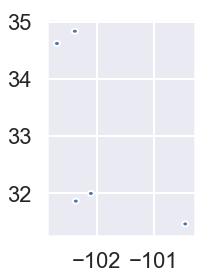

In [16]:
miles6.plot()

In [17]:
import shapely

In [18]:
import matplotlib as mpl

In [20]:
miles6.geometry[:10]

0    POLYGON ((-100.4478411 31.50712972099926, -100...
1    POLYGON ((-102.3623286 31.90665141056233, -102...
2    POLYGON ((-102.0991036 32.04005757462282, -102...
3    POLYGON ((-102.3796735 34.87992201729806, -102...
4    POLYGON ((-102.6935224 34.66555080220901, -102...
Name: geometry, dtype: object

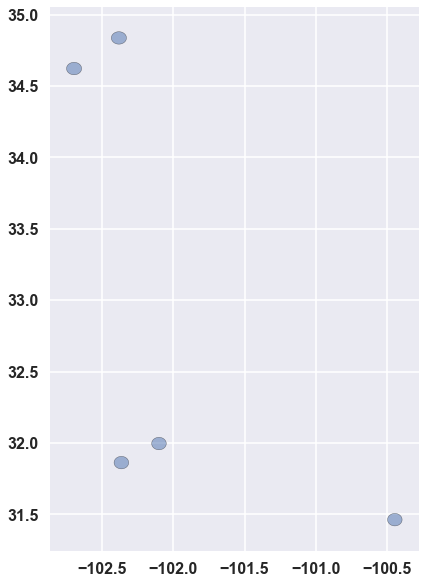

In [141]:
ax = miles6.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [142]:
ax.axis()

(-102.86362254660018,
 -100.27958722870638,
 31.24705722048131,
 35.05291557905124)

In [140]:
miles6.geometry.total_bounds

array([-102.7461664 ,   31.42005078, -100.39704338,   34.87992202])

In [143]:
llcrnrlon, llcrnrlat, urcrnrlon, urcrnrlat = miles6.geometry.total_bounds

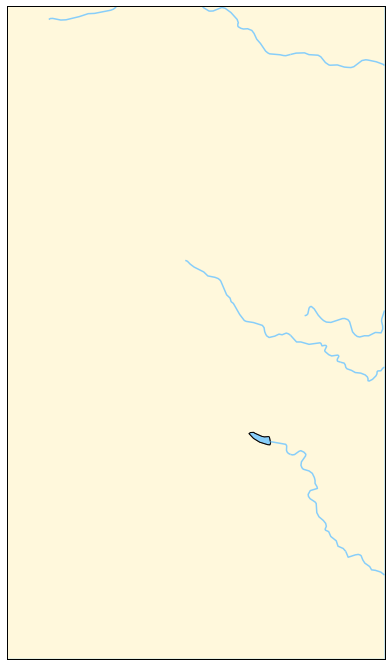

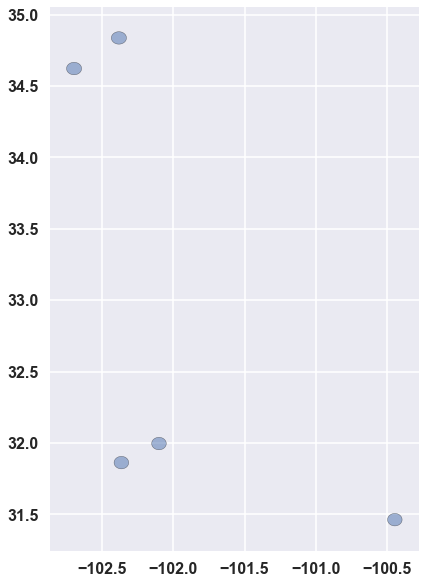

In [149]:
# draw the map background
fig = plt.figure(figsize=(15,12))
# The transverse aspect of the equidistant cassindrical projection. The globe is first rotated so the \
# central meridian becomes the “equator”, and then the normal equidistant cylindrical projection is applied
m = Basemap(projection='aea', resolution='h', lat_0=33, lon_0=-101, ellps='WGS84',\
           llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,\
           width=600000, height=400000)
m.shadedrelief()
m.drawcountries(color='gray')
m.drawcoastlines(color='gray')
m.drawstates(color='gray')
coast = m.drawcoastlines()
rivers = m.drawrivers(color=water, linewidth=1.5)
continents = m.fillcontinents(        
    color=earth,
    lake_color=water)
bound= m.drawmapboundary(fill_color=water)
countries = m.drawcountries()
fig = miles6.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [106]:
sample_pts = zip([-101.929167,-102.388633], [34.986743,34.834206])

In [118]:
sample_pts

[(-101.929167, 34.986743), (-102.388633, 34.834206)]

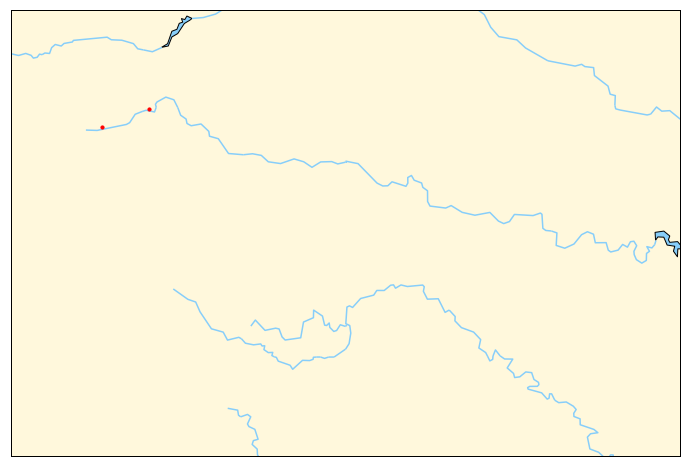

In [110]:
fig, ax1 = plt.subplots(figsize=(12, 10))
mm = Basemap(
    width=600000, height=400000, 
    resolution='i', 
    projection='aea',
    ellps='WGS84',
    lat_1=32., lat_2=40., 
    lat_0=34., lon_0=-100)
coast = mm.drawcoastlines()
rivers = mm.drawrivers(color=water, linewidth=1.5)
continents = mm.fillcontinents(        
    color=earth,
    lake_color=water)
bound= mm.drawmapboundary(fill_color=water)
countries = mm.drawcountries()
#merid = mm.drawmeridians(np.arange(-180, 180, 2), labels=[False, False, False, True])
#parall = mm.drawparallels(np.arange(0, 80), labels=[True, True, False, False]

for i in range(0, len(sample_pts)):
    x, y = mm(sample_pts[i][0], sample_pts[i][1])
    sample_scatter = mm.scatter(x, y, 10, color='red', zorder=10)

In [104]:
sample_lon, sample_lat = -101.929167, 34.986743

In [85]:
water = 'lightskyblue'
earth = 'cornsilk'
font = {'family' : 'Calibri',
        'weight': 'bold',
        'size'   : 20}
mpl.rc('font', **font)